## Observations and Insights:

* Good measures are taken to ensure fair results, where number of mice per drug tested are close and distribution of male and female mice is nearly equal 
* Tumor volume increase as timepoint increases till it reaches peak at around 25 then, there's a steady decrease 
* There's a strong positive correlation between mouse weight and tumor volume as shown in scatter plot and by correlation of 0.84 


In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
results_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
results_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice.
len(results_complete["Mouse ID"].unique())

249

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
results_complete[results_complete.duplicated(['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Optional: Get all the data for the duplicate mouse ID. 



In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# unique_mouse = results_complete.drop[results_complete["Mouse ID"]=="g989"]
indexNames = results_complete[ results_complete['Mouse ID'] == "g989" ].index
results_complete.drop(indexNames , inplace=True)
results_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice in the clean DataFrame.
len(results_complete["Mouse ID"].unique())

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_regimen = results_complete.groupby(["Drug Regimen"])
mean = drug_regimen["Tumor Volume (mm3)"].mean()
median = drug_regimen["Tumor Volume (mm3)"].median()
variance = drug_regimen["Tumor Volume (mm3)"].var()
standard_deviation = drug_regimen["Tumor Volume (mm3)"].std()
sem = drug_regimen["Tumor Volume (mm3)"].sem()
number = drug_regimen["Mouse ID"].count()
drug_regimen_df = pd.DataFrame({"Mean": mean,
                                "Median": median,
                                "Variance": variance,
                                "Standard deviation": standard_deviation,
                                "SEM": sem})
drug_regimen_df.style.format({"Mean":"${:,.2f}",
                                      "Median":"${:,.2f}",
                                     "Variance":"${:,.2f}",
                                     "Standard deviation":"${:,.4f}",
                                     "SEM":"${:,.4f}"})

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,$40.68,$41.56,$24.95,$4.9948,$0.3293
Ceftamin,$52.59,$51.78,$39.29,$6.2682,$0.4698
Infubinol,$52.88,$51.82,$43.13,$6.5672,$0.4922
Ketapril,$55.24,$53.70,$68.55,$8.2797,$0.6039
Naftisol,$54.33,$52.51,$66.17,$8.1347,$0.5965
Placebo,$54.03,$52.29,$61.17,$7.8210,$0.5813
Propriva,$52.32,$50.45,$43.85,$6.6221,$0.5443
Ramicane,$40.22,$40.67,$23.49,$4.8463,$0.3210
Stelasyn,$54.23,$52.43,$59.45,$7.7104,$0.5731


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



In [45]:
drug_regimen_id = results_complete.groupby(["Drug Regimen"])
mouse_count= drug_regimen_id["Drug Regimen"].count()
mouse_count = pd.DataFrame(mouse_count)
mouse_count

,Drug Regimen
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


## Bar and Pie Charts

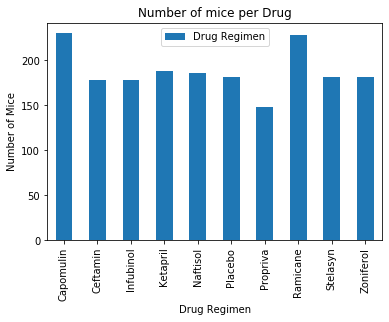

<Figure size 432x288 with 0 Axes>

In [46]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
gender_chart = mouse_count.plot(kind="bar", title="Number of mice per Drug")
gender_chart.set_xlabel("Drug Regimen")
gender_chart.set_ylabel("Number of Mice")
plt.show()
plt.tight_layout()

([<matplotlib.axis.XTick at 0x1a1ed8b5d0>,
 <a list of 10 Text xticklabel objects>)

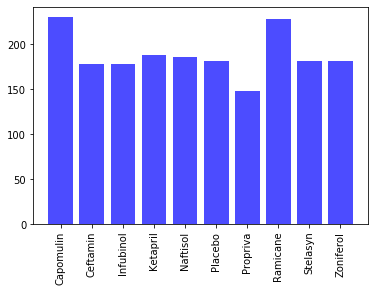

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mouse_count))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mouse_count["Drug Regimen"], color='b', alpha=0.7, align="center")
plt.xticks(tick_locations, mouse_count.index, rotation="vertical")

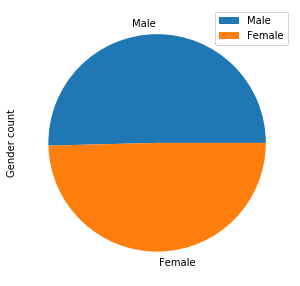

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# gender_dis = results_complete.groupby(["Mouse ID"])
gender_dis = results_complete.drop_duplicates(subset=['Mouse ID'])
gender_count = gender_dis["Sex"].value_counts()
gender_dis_df = pd.DataFrame({"Gender count":gender_count})
plot = gender_dis_df.plot.pie(y='Gender count', figsize=(5, 5))

(-1.1001516367431872,
 1.1031843716069307,
 -1.1018390827045563,
 1.103492681505578)

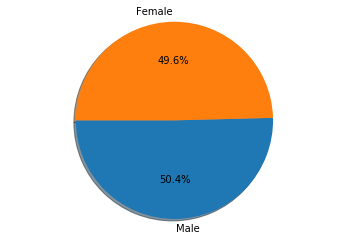

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count,labels= gender_dis_df.index, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
drug_unique = results_complete.groupby(["Drug Regimen","Mouse ID"])['Timepoint'].max()
drug = pd.DataFrame(drug_unique)
rows = drug.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
print(type(rows))
rows
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_complete = pd.merge(rows, results_complete, how="left", on=["Mouse ID", "Timepoint"])
drug_complete

<class 'pandas.core.frame.DataFrame'>


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


In [110]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
f = f.sort_values(['Drug Regimen','Tumor Volume (mm3)'])
z = f[['Drug Regimen','Tumor Volume (mm3)']]

# Locate the rows which contain mice on each drug and get the tumor volumes
d = [z[z['Drug Regimen']== drug]['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75]) for drug in drugs]
q = pd.DataFrame(d)
IQR = q[0.75]- q[0.25]
R = IQR*1.5
LB = q[0.25] - R
UB = q[0.75] + R
for item_a, item_b in zip(drugs, LB):
    print(f"The lower bound for {item_a} is {item_b}")
for item_a, item_b in zip(drugs, UB):
    print(f"The upper bound for {item_a} is {item_b}")
for item_a, item_b in zip(drugs, IQR):    
    print(f"The interquartile range for {item_a} is {item_b}") 

The lower bound for Capomulin is 20.70456164999999
The lower bound for Ramicane is 17.912664470000003
The lower bound for Infubinol is 36.83290494999999
The lower bound for Ceftamin is 25.355449580000002
The upper bound for Capomulin is 51.83201549
The upper bound for Ramicane is 54.30681135
The upper bound for Infubinol is 82.74144559000001
The upper bound for Ceftamin is 87.66645829999999
The interquartile range for Capomulin is 7.781863460000004
The interquartile range for Ramicane is 9.098536719999998
The interquartile range for Infubinol is 11.477135160000003
The interquartile range for Ceftamin is 15.577752179999997


{'whiskers': [<matplotlib.lines.Line2D at 0x105f649d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1bf0cd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1f8a7f10>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1c6fc190>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1bf0c450>,
 'means': []}

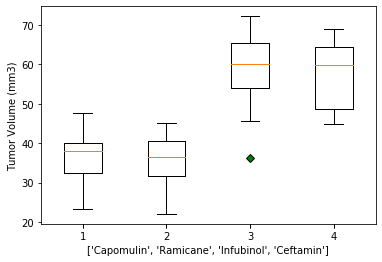

In [97]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [x[x['Drug Regimen']== drug]['Tumor Volume (mm3)'] for drug in drugs]
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
positions = (1, 2, 3, 4)
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel(drugs)
plt.xticks(positions)
ax1.boxplot(data, flierprops=green_diamond)

## Line and Scatter Plots

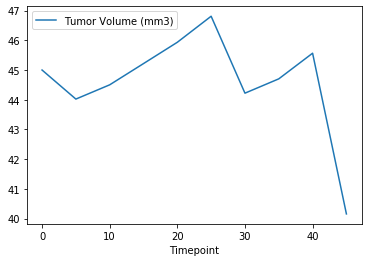

In [98]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
results = results_complete.set_index('Mouse ID')
results = results.loc["g316"]
results.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

/Users/yasminekhalifa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


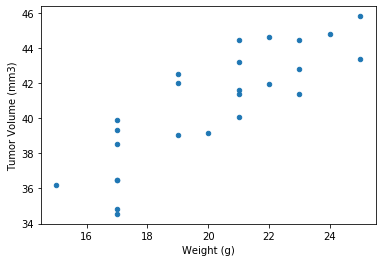

In [99]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
results = results_complete.set_index('Drug Regimen')
results_k = results.loc["Capomulin"]
x = results_k.groupby(["Mouse ID"])
mouse_count= x["Weight (g)","Tumor Volume (mm3)"].mean()
mouse_count = pd.DataFrame(mouse_count)
mouse_count.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = mouse_count.iloc[:,0]
tumor_volume = mouse_count.iloc[:,1]
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [101]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


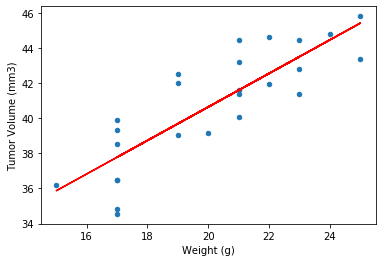

In [106]:
mouse_count.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.plot(weight,regress_values,"r-")